# Tugas Besar Pemodelan, Simulasi dan Optimasi

**OLEH KELOMPOK 1**:
- Muhammad Karov Ardava Barus - 103052300001
- Avatar Bintang Ramadhan - 103052300007
- Tesalonika Maura Ardy 103052300010


### **Deskripsi Proyek**
Proyek ini bertujuan untuk memodelkan dan mensimulasikan pergerakan harga saham menggunakan metode **Random Walk**. Random Walk adalah pendekatan stokastik yang digunakan untuk memperkirakan perubahan harga saham berdasarkan data historis, dengan mempertimbangkan rata-rata pengembalian harian dan volatilitas.

Simulasi ini diterapkan pada saham dari empat sektor berbeda:
1. **Tesla** (Sektor Industri)
2. **United Health Care** (Sektor Kesehatan)
3. **NextEra Energy Inc** (Sektor Energi)
4. **Bank Indonesia** (Sektor Keuangan)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Sektor Industri (Tesla)

In [2]:
tesla = pd.read_csv('data/tesla.csv')

# Parse tanggal dan mengatur sebagai indeks
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla.set_index('Date', inplace=True)


tesla = tesla.loc['2024']

# Mengambil harga penutupan sebagai basis simulasi
closing_prices = tesla['Close']

tesla.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2024-01-02,2264,250.080002,251.250000,244.410004,248.419998,104654200
2024-01-03,2265,244.979996,245.679993,236.320007,238.449997,121082600
2024-01-04,2266,239.250000,242.699997,237.729996,237.929993,102629300
2024-01-05,2267,236.860001,240.119995,234.899994,237.490005,92379400
2024-01-08,2268,236.139999,241.250000,235.300003,240.449997,85166600


Menghitung daily returns

In [3]:
# Menghitung pengembalian harian (daily returns)
daily_returns = closing_prices.pct_change().dropna()

Penjelasan:

- `pct_change()` menghitung persentase perubahan harian pada harga saham.
- `dropna()` digunakan untuk menghapus nilai kosong (yang muncul karena perhitungan perubahan pertama).

Parameter dan Simulasi Random Walk

In [4]:
# Parameter simulasi
num_days = 252  # Jumlah hari perdagangan dalam setahun
num_simulations = 10  # Jumlah skenario simulasi

# Rata-rata dan deviasi standar pengembalian harian
mu = daily_returns.mean()
sigma = daily_returns.std()

In [8]:
print('Rata-rata pengembalian harian:', mu)
print('Standar deviasi pengembalian harian:', sigma)

Rata-rata pengembalian harian: -0.013288807925108706
Standar deviasi pengembalian harian: 0.019091557986015653


**Penjelasan**:

- `num_days`: Jumlah hari perdagangan dalam setahun adalah 252 hari.
- `num_simulations`: Menentukan berapa banyak jalur (skenario) simulasi yang ingin dibuat.
- `mu` dan `sigma`: Rata-rata dan standar deviasi pengembalian harian digunakan untuk menggambarkan distribusi normal dari pergerakan harga.

Simulasi

In [9]:
# Inisialisasi matriks simulasi
simulations = np.zeros((num_days, num_simulations))
initial_price = closing_prices[-1]

# Melakukan simulasi
for sim in range(num_simulations):
    simulations[0, sim] = initial_price
    for day in range(1, num_days):
        random_shock = np.random.normal(mu, sigma)
        simulations[day, sim] = simulations[day - 1, sim] * (1 + random_shock)


Visualisasi hasil

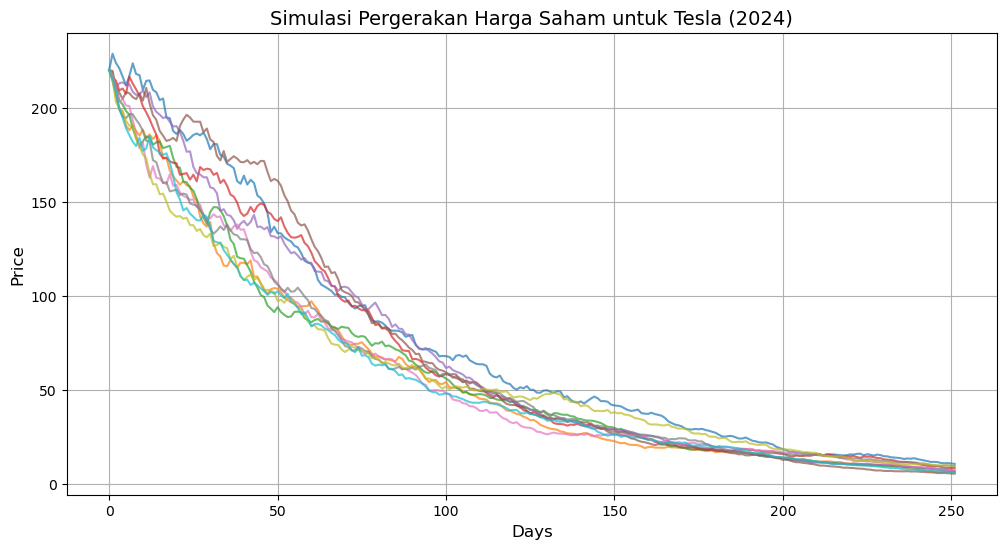

In [10]:
# Plot jalur simulasi
plt.figure(figsize=(12, 6))
for sim in range(num_simulations):
    plt.plot(simulations[:, sim], alpha=0.7)
plt.title('Simulasi Pergerakan Harga Saham untuk Tesla (2024)', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.show()

### Hasil Analisis Pergerakan Saham Metode Random Walk: Tesla
**Data Statistik**:
- **Rata-rata pengembalian harian: -0.0133**
  - Nilai rata-rata pengembalian yang negatif dan cukup besar mencerminkan tren penurunan harga saham Tesla dalam data historis.
- **Standar deviasi pengembalian harian: 0.0191**
  - Volatilitas yang cukup tinggi mencerminkan adanya fluktuasi harga yang signifikan, meskipun tren keseluruhan tetap menurun.

**Analisis Grafik**:
- Grafik menunjukkan bahwa hampir semua jalur simulasi mengalami penurunan tajam dalam jangka panjang.
- Beberapa fluktuasi kecil terlihat pada awal simulasi, tetapi karena rata-rata pengembalian harian negatif cukup besar (\(-1.33\%\)), tren utama tetap menurun.
- Harga saham dalam simulasi cenderung mendekati nol sebelum hari ke-252, menunjukkan risiko yang sangat tinggi.

**Kesimpulan**:
- Saham Tesla dalam simulasi memiliki tren penurunan yang sangat signifikan, yang dapat mencerminkan tantangan besar di sektor teknologi/otomotif.
- Untuk mengubah tren ini, dibutuhkan faktor eksternal yang signifikan seperti inovasi besar, perubahan strategi, atau peningkatan sentimen pasar.
- **Investor perlu berhati-hati** jika tren historis ini berlanjut, karena potensi kerugian besar terlihat dalam simulasi.



## 2. Sektor kesehatan (United Health Care)

In [11]:
health = pd.read_csv('data/UnitedHealthCare.csv')

# Parse tanggal dan mengatur sebagai indeks
health['Date'] = pd.to_datetime(health['Date'])
health.set_index('Date', inplace=True)

health = health.loc['2022'] # asumsi tahun 2022 ini adalah data historis tahun 2024

# Mengambil harga penutupan sebagai basis simulasi
closing_prices = health['Close']

health.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03,500.000000,502.899994,493.049988,502.279999,3033600,0.0,0.0
2022-01-04,503.200012,503.750000,490.880005,490.899994,3908100,0.0,0.0
2022-01-05,494.769989,497.000000,489.690002,489.690002,3921100,0.0,0.0
2022-01-06,480.000000,484.140015,463.119995,469.649994,6555200,0.0,0.0
2022-01-07,467.690002,467.970001,455.549988,458.600006,5493700,0.0,0.0


Menghitung daily returns

In [12]:
# Menghitung pengembalian harian (daily returns)
daily_returns = closing_prices.pct_change().dropna()

Penjelasan:

- `pct_change()` menghitung persentase perubahan harian pada harga saham.
- `dropna()` digunakan untuk menghapus nilai kosong (yang muncul karena perhitungan perubahan pertama).

Parameter dan Simulasi Random Walk

In [13]:
# Parameter simulasi
num_days = 252  # Jumlah hari perdagangan dalam setahun
num_simulations = 10  # Jumlah skenario simulasi

# Rata-rata dan deviasi standar pengembalian harian
mu = daily_returns.mean()
sigma = daily_returns.std()

In [14]:
print('Rata-rata pengembalian harian:', mu)
print('Standar deviasi pengembalian harian:', sigma)

Rata-rata pengembalian harian: -0.0002624814973131931
Standar deviasi pengembalian harian: 0.015111409712308769


**Penjelasan**:

- `num_days`: Jumlah hari perdagangan dalam setahun adalah 252 hari.
- `num_simulations`: Menentukan berapa banyak jalur (skenario) simulasi yang ingin dibuat.
- `mu` dan `sigma`: Rata-rata dan standar deviasi pengembalian harian digunakan untuk menggambarkan distribusi normal dari pergerakan harga.

Simulasi

In [10]:
# Inisialisasi matriks simulasi
simulations = np.zeros((num_days, num_simulations))
initial_price = closing_prices[-1]

# Melakukan simulasi
for sim in range(num_simulations):
    simulations[0, sim] = initial_price
    for day in range(1, num_days):
        random_shock = np.random.normal(mu, sigma)
        simulations[day, sim] = simulations[day - 1, sim] * (1 + random_shock)


Visualisasi hasil

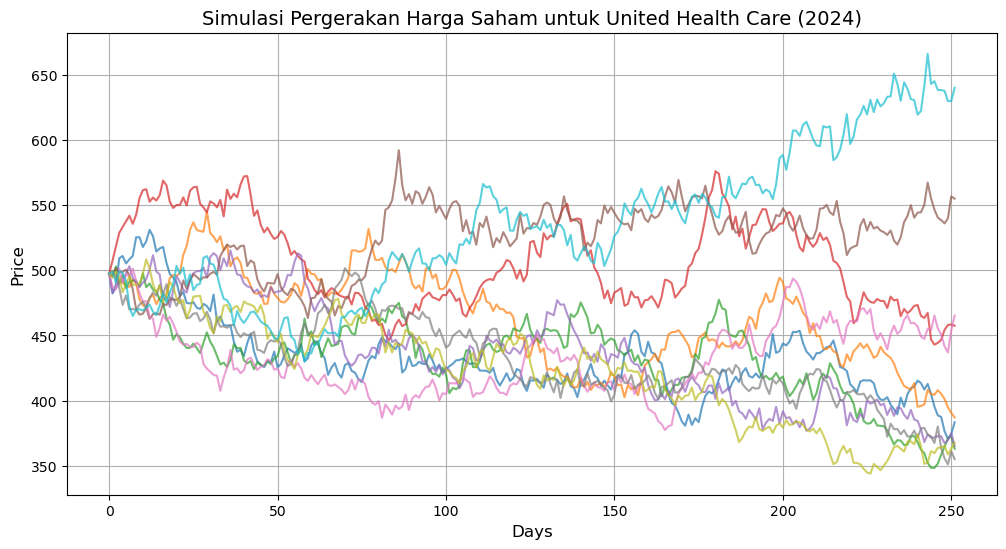

In [11]:
# Plot jalur simulasi
plt.figure(figsize=(12, 6))
for sim in range(num_simulations):
    plt.plot(simulations[:, sim], alpha=0.7)
plt.title('Simulasi Pergerakan Harga Saham untuk United Health Care (2024)', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.show()

#### Hasil Analisis Pergerakan Saham Metode Random Walk: United Health Care

**Data Statistik**:
- **Rata-rata pengembalian harian: -0.0003**
  - Nilai rata-rata pengembalian negatif yang sangat kecil (\(-0.03\%\)) mencerminkan tren penurunan harga saham yang sangat ringan atau hampir stagnan.
- **Standar deviasi pengembalian harian: 0.0151**
  - Volatilitas moderat menunjukkan fluktuasi yang tidak terlalu ekstrem dalam pergerakan harga saham.

**Analisis Grafik**:
- Grafik menunjukkan sebagian besar jalur simulasi bergerak stabil dengan sedikit tren menurun.
- Beberapa jalur menunjukkan kenaikan sementara, yang disebabkan oleh volatilitas dan fluktuasi acak dalam Random Walk.
- Tren utama cenderung mendekati stagnasi atau penurunan kecil karena rata-rata pengembalian harian negatif yang sangat kecil.

**Kesimpulan**:
- Saham United Health Care dalam simulasi mencerminkan risiko moderat dengan tren penurunan yang sangat ringan.
- Sektor ini cenderung menarik bagi investor yang mencari stabilitas dan fluktuasi harga yang lebih rendah dibandingkan sektor teknologi.
- **Catatan Penting**:
  - Jika faktor eksternal mendukung (seperti perubahan kebijakan kesehatan atau inovasi dalam sektor ini), tren ini dapat berubah menjadi positif.

## 3. Sektor Energi

In [15]:
energy = pd.read_csv('data/NEE.csv')

# Parse tanggal dan mengatur sebagai indeks
energy['Date'] = pd.to_datetime(energy['Date'])
energy.set_index('Date', inplace=True)

energy = energy.loc['2024']

# Mengambil harga penutupan sebagai basis simulasi
closing_prices = energy['Close']

energy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,60.549999,62.150002,60.180000,61.570000,61.011555,10064300
2024-01-03,61.110001,62.119999,60.459999,61.990002,61.427746,10306300
2024-01-04,62.169998,62.759998,61.730000,61.799999,61.239468,10568100
2024-01-05,61.650002,62.560001,61.270000,62.080002,61.516930,7803800
2024-01-08,61.779999,63.060001,61.590000,62.919998,62.349308,7766600


Menghitung daily returns

In [16]:
# Menghitung pengembalian harian (daily returns)
daily_returns = closing_prices.pct_change().dropna()

Penjelasan:

- `pct_change()` menghitung persentase perubahan harian pada harga saham.
- `dropna()` digunakan untuk menghapus nilai kosong (yang muncul karena perhitungan perubahan pertama).

Parameter dan Simulasi Random Walk

In [17]:
# Parameter simulasi
num_days = 252  # Jumlah hari perdagangan dalam setahun
num_simulations = 10  # Jumlah skenario simulasi

# Rata-rata dan deviasi standar pengembalian harian
mu = daily_returns.mean()
sigma = daily_returns.std()

In [18]:
print('Rata-rata pengembalian harian:', mu)
print('Standar deviasi pengembalian harian:', sigma)

Rata-rata pengembalian harian: 0.0011460991428704614
Standar deviasi pengembalian harian: 0.015601399841091969


**Penjelasan**:

- `num_days`: Jumlah hari perdagangan dalam setahun adalah 252 hari.
- `num_simulations`: Menentukan berapa banyak jalur (skenario) simulasi yang ingin dibuat.
- `mu` dan `sigma`: Rata-rata dan standar deviasi pengembalian harian digunakan untuk menggambarkan distribusi normal dari pergerakan harga.

Simulasi

In [19]:
# Inisialisasi matriks simulasi
simulations = np.zeros((num_days, num_simulations))
initial_price = closing_prices[-1]

# Melakukan simulasi
for sim in range(num_simulations):
    simulations[0, sim] = initial_price
    for day in range(1, num_days):
        random_shock = np.random.normal(mu, sigma)
        simulations[day, sim] = simulations[day - 1, sim] * (1 + random_shock)


Visualisasi hasil

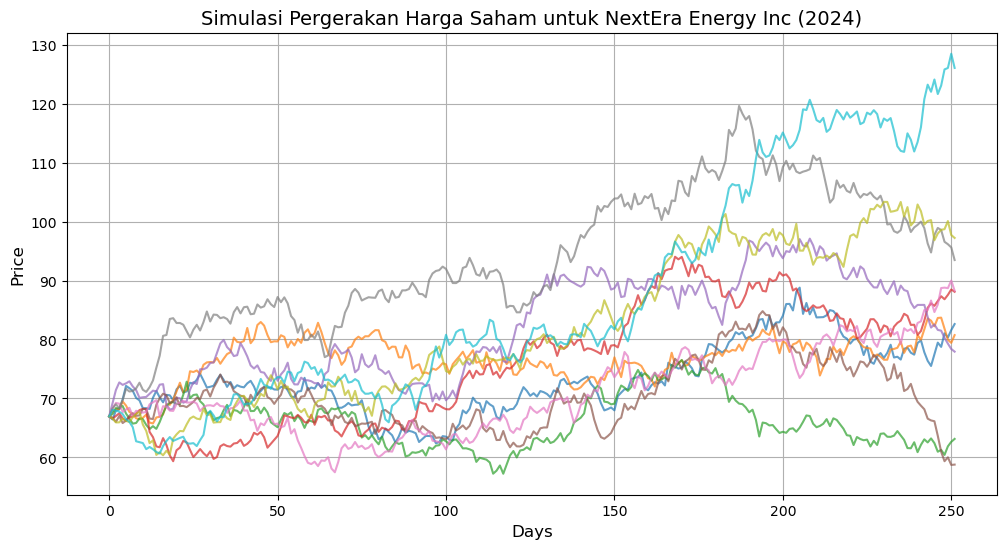

In [20]:
# Plot jalur simulasi
plt.figure(figsize=(12, 6))
for sim in range(num_simulations):
    plt.plot(simulations[:, sim], alpha=0.7)
plt.title('Simulasi Pergerakan Harga Saham untuk NextEra Energy Inc (2024)', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.show()

#### Hasil Analisis Pergerakan Saham Metode Random Walk: NextEra Energy Inc

**Data Statistik**:
- **Rata-rata pengembalian harian): 0.0011**
  - Nilai rata-rata positif (\(+0.11\%\)) menunjukkan adanya tren pertumbuhan harga saham secara historis.
- **Standar deviasi pengembalian harian: 0.0156**
  - Volatilitas moderat menunjukkan bahwa pergerakan harga relatif stabil dengan fluktuasi yang tidak terlalu besar.

**Analisis Grafik**:
- Grafik menunjukkan tren kenaikan yang jelas pada sebagian besar jalur simulasi.
- Beberapa jalur memiliki fluktuasi kecil, tetapi tren keseluruhan tetap positif karena rata-rata pengembalian positif.
- Sektor energi terbarukan ini menunjukkan kepercayaan pasar terhadap masa depan industri yang berkelanjutan.

**Kesimpulan**:
- Saham NextEra Energy Inc mencerminkan prospek pertumbuhan yang stabil dan menarik bagi investor jangka panjang.
- Risiko relatif moderat membuat sektor ini cocok bagi investor yang mencari keseimbangan antara pertumbuhan dan stabilitas.
- **Peluang Investasi**:
  - Sektor ini didukung oleh tren global menuju energi hijau, yang dapat memperkuat tren positif di masa mendatang.


## 3. Sektor Keuangan

In [21]:
bank = pd.read_csv('data/bank.csv')

# Parse tanggal dan mengatur sebagai indeks
bank['Date'] = pd.to_datetime(bank['Date'])
bank.set_index('Date', inplace=True)

bank = bank.loc['2024']

# Mengambil harga penutupan sebagai basis simulasi
closing_prices = bank['Close']

bank.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,9400.0,9425.0,9350.0,9425.0,9425.0,30545200
2024-01-03,9425.0,9425.0,9325.0,9350.0,9350.0,34603300
2024-01-04,9400.0,9475.0,9375.0,9475.0,9475.0,56501800
2024-01-05,9500.0,9600.0,9475.0,9575.0,9575.0,85290100
2024-01-08,9600.0,9625.0,9475.0,9575.0,9575.0,50896000


Menghitung daily returns

In [22]:
# Menghitung pengembalian harian (daily returns)
daily_returns = closing_prices.pct_change().dropna()

Penjelasan:

- `pct_change()` menghitung persentase perubahan harian pada harga saham.
- `dropna()` digunakan untuk menghapus nilai kosong (yang muncul karena perhitungan perubahan pertama).

Parameter dan Simulasi Random Walk

In [23]:
# Parameter simulasi
num_days = 252  # Jumlah hari perdagangan dalam setahun
num_simulations = 10  # Jumlah skenario simulasi

# Rata-rata dan deviasi standar pengembalian harian
mu = daily_returns.mean()
sigma = daily_returns.std()

In [24]:
print('Rata-rata pengembalian harian:', mu)
print('Standar deviasi pengembalian harian:', sigma)

Rata-rata pengembalian harian: 0.001220319914576945
Standar deviasi pengembalian harian: 0.009193244804218296


**Penjelasan**:

- `num_days`: Jumlah hari perdagangan dalam setahun adalah 252 hari.
- `num_simulations`: Menentukan berapa banyak jalur (skenario) simulasi yang ingin dibuat.
- `mu` dan `sigma`: Rata-rata dan standar deviasi pengembalian harian digunakan untuk menggambarkan distribusi normal dari pergerakan harga.

Simulasi

In [25]:
# Inisialisasi matriks simulasi
simulations = np.zeros((num_days, num_simulations))
initial_price = closing_prices[-1]

# Melakukan simulasi
for sim in range(num_simulations):
    simulations[0, sim] = initial_price
    for day in range(1, num_days):
        random_shock = np.random.normal(mu, sigma)
        simulations[day, sim] = simulations[day - 1, sim] * (1 + random_shock)


Visualisasi hasil

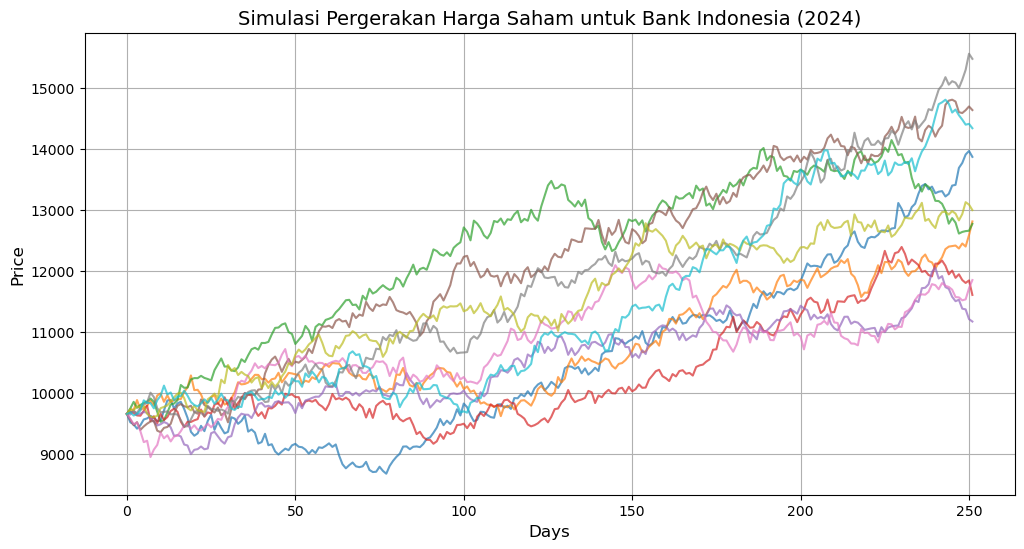

In [26]:
# Plot jalur simulasi
plt.figure(figsize=(12, 6))
for sim in range(num_simulations):
    plt.plot(simulations[:, sim], alpha=0.7)
plt.title('Simulasi Pergerakan Harga Saham untuk Bank Indonesia (2024)', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.show()

#### Hasil Analisis Pergerakan Saham Metode Random Walk: Bank Indonesia

**Data Statistik**:
- **Rata-rata pengembalian harian: 0.0012**
  - Nilai rata-rata positif (\(+0.12\%\)) mencerminkan pertumbuhan yang moderat dalam harga saham historis.
- **Standar deviasi pengembalian harian: 0.0092**
  - Volatilitas rendah menunjukkan fluktuasi harga yang sangat kecil, mencerminkan stabilitas tinggi dalam sektor keuangan ini.

**Analisis Grafik**:
- Grafik menunjukkan tren kenaikan yang stabil pada hampir semua jalur simulasi.
- Fluktuasi harga sangat kecil, mencerminkan stabilitas yang baik di sektor keuangan.
- Tren positif yang konsisten menandakan bahwa sektor ini memiliki risiko rendah dengan potensi pertumbuhan yang moderat.

**Kesimpulan**:
- Saham Bank Indonesia mencerminkan stabilitas tinggi, membuatnya cocok untuk investor konservatif yang mencari pertumbuhan aman.
- Risiko yang rendah menjadikan sektor keuangan ini menarik sebagai pilihan defensif dalam portofolio.
- **Potensi Masa Depan**:
  - Sektor keuangan cenderung dipengaruhi oleh kebijakan moneter dan stabilitas ekonomi nasional, yang bisa memperkuat tren positif ini.


### Catatan:
Mengapa jumlah hari perdagangan dalam setahun (`num_days`) dibuat Sebagai 252 Hari?

Jumlah **252 hari** mencerminkan rata-rata hari perdagangan pasar saham dalam setahun, dengan asumsi pasar hanya buka pada hari kerja (Senin–Jumat) dan tutup pada akhir pekan serta hari libur nasional. Penggunaan 252 hari adalah standar industri untuk simulasi pasar saham karena lebih realistis dibandingkan menggunakan 365 hari, yang akan memasukkan hari-hari di mana pasar tidak aktif, seperti akhir pekan dan hari libur.
